In [ ]:
import logging
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [ ]:
df_raw = pd.read_excel("/workspaces/clases_4geeks/Concrete_Data.xls")
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [ ]:
df_raw.sample(10,random_state=2025)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
565,295.80,0.00,0.00,185.70,0.00,1091.4,769.30,7,14.843729
690,288.00,192.00,0.00,192.00,0.00,932.0,717.80,7,23.523542
636,300.00,0.00,0.00,184.00,0.00,1075.0,795.00,28,26.848195
43,380.00,0.00,0.00,228.00,0.00,932.0,670.00,180,53.104131
720,203.50,305.30,0.00,203.50,0.00,963.4,630.00,90,51.863764
346,213.74,0.00,174.74,154.79,10.16,1053.5,776.35,28,40.148187
149,425.00,106.30,0.00,153.50,16.50,852.1,887.10,56,64.300532
376,376.00,0.00,0.00,214.60,0.00,1003.5,762.36,28,31.971002
605,236.00,0.00,0.00,194.00,0.00,968.0,885.00,3,6.467285
436,172.38,13.61,172.37,156.76,4.14,1006.3,856.40,28,33.687797


## **Data dictionary**
| Name | Description | Type | Units |
| -- | -- | -- | -- |
|Cement| (component 1)(kg in a m^3 mixture) | float | kg/m³
|Blast_Furnace_Slag| (component 2)(kg in a m^3 mixture) | int | kg/m³
|Fly_Ash | (component 3)(kg in a m^3 mixture) | float | kg/m³
|Water | (component 4)(kg in a m^3 mixture) | float | kg/m³
|Superplasticizer | (component 5)(kg in a m^3 mixture) | float | kg/m³
|Coarse_Aggregate  | (component 6)(kg in a m^3 mixture) | float | kg/m³
|Fine_Aggregate  | (component 7)(kg in a m^3 mixture) | float | kg/m³
|Age   | (day) | int | day
|Concrete_compressive_strength  | (MPa, megapascals) | float | MPa

-----------------------------

In [ ]:
#Steap 2. Data preprocessing
df_baking = df_raw.copy()

#Renombrar columnas
df_baking.columns = (
    ['cement', 'blast_furnace_salag', 'fly_ash', 'water', 'superplasticizer',
    'coarse_aggregate', 'fine_aggregate', 'age', 'concrete_compressive_strength']
)
df_baking["log_age"] = df_baking['age'].apply(lambda x: np.log(x))
df_baking = df_baking.drop(columns = ['age'])
df = df_baking.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_salag            1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   concrete_compressive_strength  1030 non-null   float64
 8   log_age                        1030 non-null   float64
dtypes: float64(9)
memory usage: 72.6 KB


In [ ]:
df_train, df_test = train_test_split(df, test_size=0.1, random_state=2025)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df_train.head(5)

,cement,blast_furnace_salag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,concrete_compressive_strength,log_age
0,525.0,0.0,0.0,189.0,0.0,1125.0,613.0,42.423458,1.945910
1,330.5,169.6,0.0,194.9,8.1,811.0,802.3,56.619080,3.332205
2,400.0,0.0,0.0,187.0,0.0,1025.0,745.0,43.698989,3.332205
3,362.6,189.0,0.0,164.9,11.6,944.7,755.8,55.895819,1.945910
4,350.0,0.0,0.0,203.0,0.0,974.0,775.0,31.350474,4.499810


In [ ]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,927.0,281.477929,105.229066,102.000000,190.680000,272.800000,355.000000,540.000000
blast_furnace_salag,927.0,75.280723,86.786700,0.000000,0.000000,24.000000,144.700000,359.400000
fly_ash,927.0,53.549892,63.746390,0.000000,0.000000,0.000000,118.270000,200.100000
water,927.0,181.693808,21.552942,121.750000,164.900000,185.000000,192.350000,247.000000
superplasticizer,927.0,6.213849,5.998284,0.000000,0.000000,6.470000,10.300000,32.200000
coarse_aggregate,927.0,972.416386,77.549650,801.000000,932.000000,968.000000,1029.400000,1145.000000
fine_aggregate,927.0,772.398598,80.803144,594.000000,725.950000,778.450000,824.000000,992.600000
concrete_compressive_strength,927.0,35.943990,16.783864,2.331808,23.817948,34.673748,46.231779,82.599225
log_age,927.0,3.171551,1.186226,0.000000,1.945910,3.332205,4.025352,5.899897


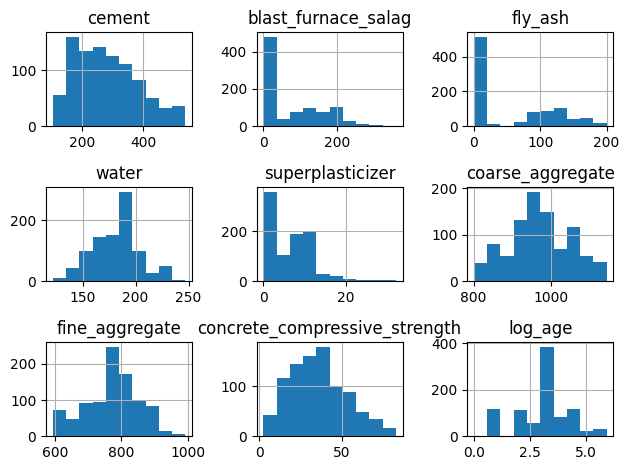

In [ ]:
df_train.hist()
plt.tight_layout()
plt.show()

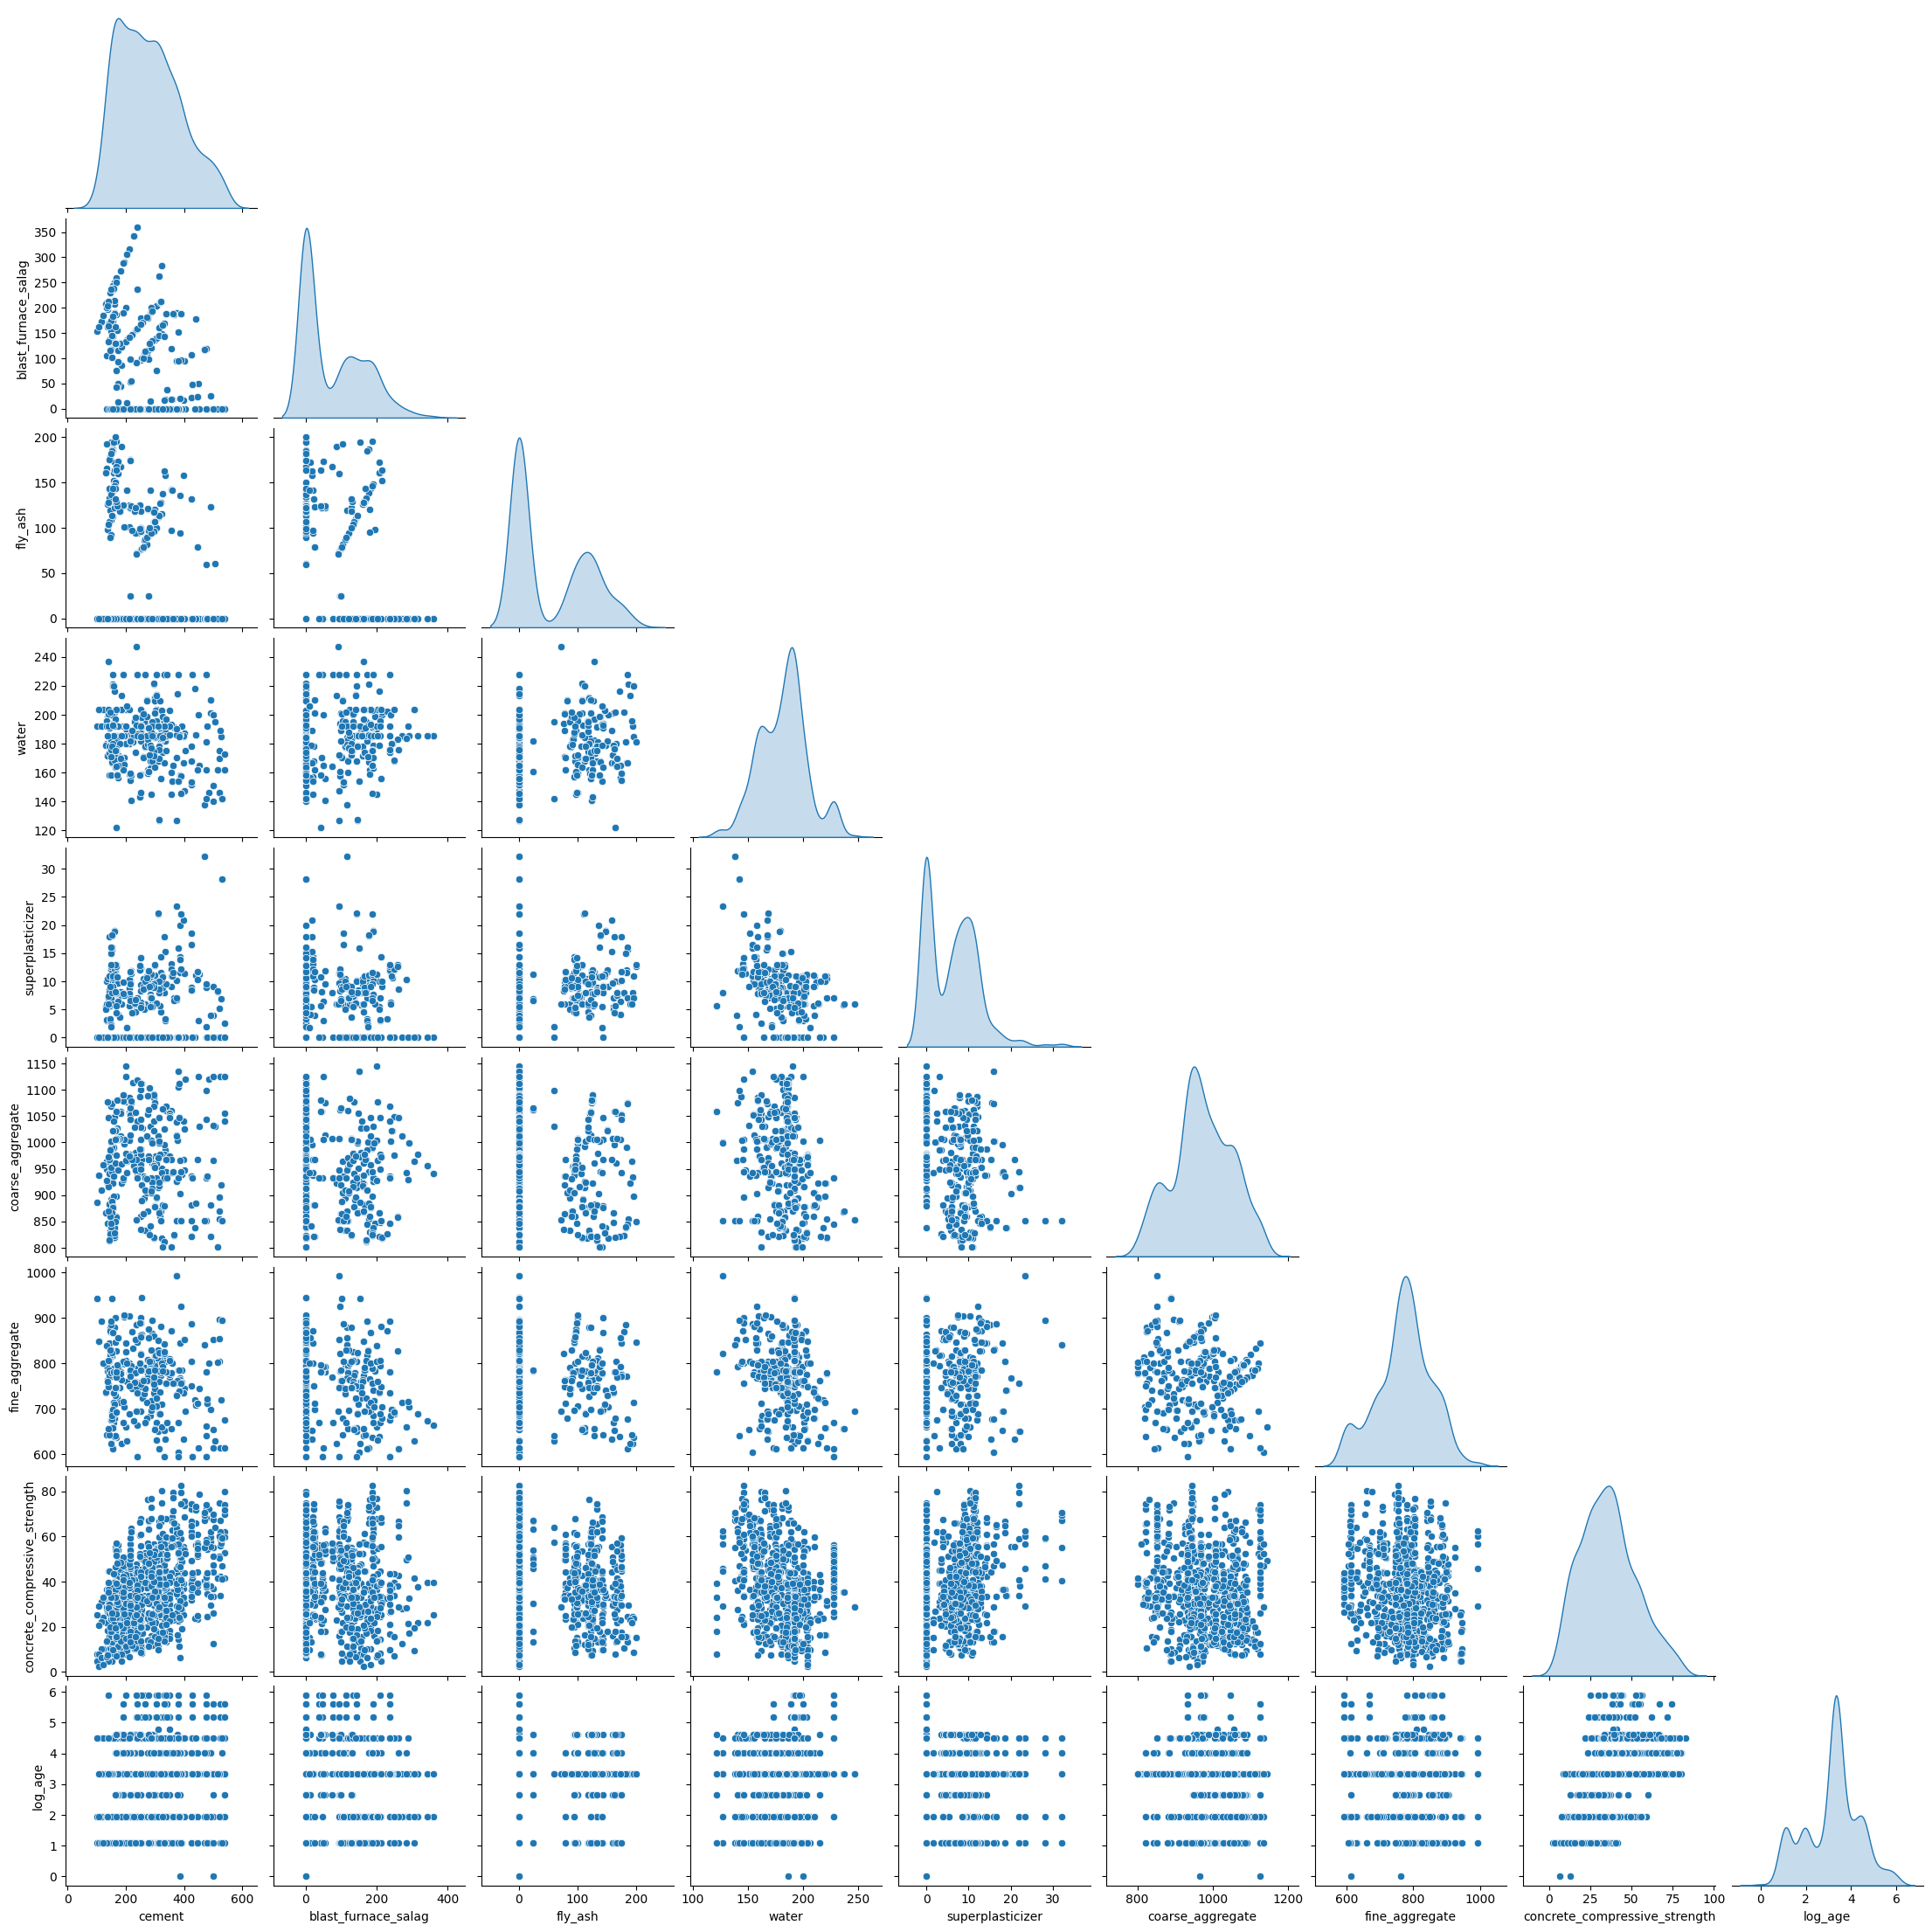

In [ ]:
sns.pairplot(df_train, diag_kind='kde', corner=True)
plt.show()

In [ ]:
df_train.corr().T

,cement,blast_furnace_salag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,concrete_compressive_strength,log_age
cement,1.000000,-0.286811,-0.395883,-0.082938,0.086101,-0.108218,-0.223511,0.502941,0.009444
blast_furnace_salag,-0.286811,1.000000,-0.310930,0.104724,0.052559,-0.280456,-0.281510,0.120990,-0.029724
fly_ash,-0.395883,-0.310930,1.000000,-0.247840,0.376643,-0.015507,0.074143,-0.090414,0.002605
water,-0.082938,0.104724,-0.247840,1.000000,-0.651050,-0.186284,-0.455607,-0.297704,0.155329
superplasticizer,0.086101,0.052559,0.376643,-0.651050,1.000000,-0.263148,0.217462,0.375683,-0.034993
coarse_aggregate,-0.108218,-0.280456,-0.015507,-0.186284,-0.263148,1.000000,-0.169208,-0.167665,-0.037439
fine_aggregate,-0.223511,-0.281510,0.074143,-0.455607,0.217462,-0.169208,1.000000,-0.165784,-0.121518
concrete_compressive_strength,0.502941,0.120990,-0.090414,-0.297704,0.375683,-0.167665,-0.165784,1.000000,0.554372
log_age,0.009444,-0.029724,0.002605,0.155329,-0.034993,-0.037439,-0.121518,0.554372,1.000000


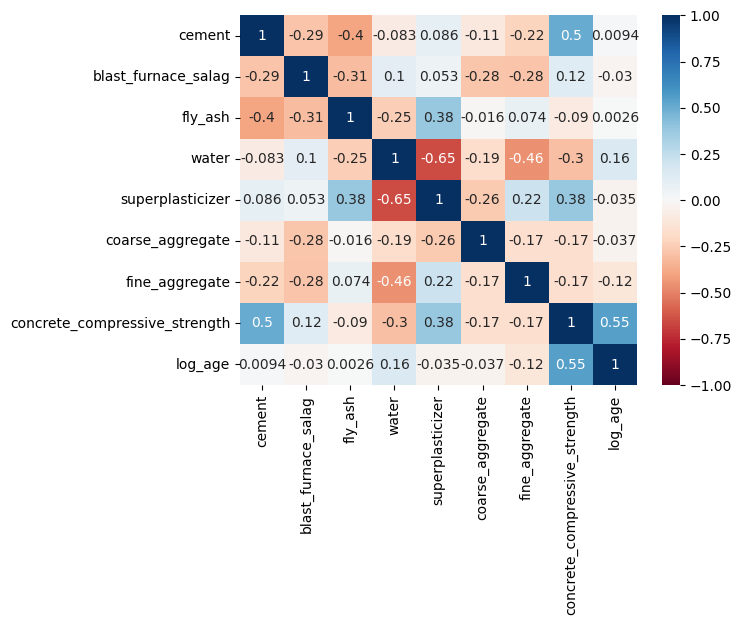

In [ ]:
sns.heatmap(data= df_train.corr(), vmin=-1, vmax=1, cmap="RdBu", annot=True) #Solo funciona con variables numericas
plt.show()

------------------

## **EDA for categorical dependent variable**

In [ ]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/orange_juice_withmissing.csv"
df_juice_raw = pd.read_csv(url)
df_juice_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Purchase        1070 non-null   object 
 1   WeekofPurchase  1070 non-null   int64  
 2   StoreID         1069 non-null   float64
 3   PriceCH         1069 non-null   float64
 4   PriceMM         1066 non-null   float64
 5   DiscCH          1068 non-null   float64
 6   DiscMM          1066 non-null   float64
 7   SpecialCH       1068 non-null   float64
 8   SpecialMM       1065 non-null   float64
 9   LoyalCH         1065 non-null   float64
 10  SalePriceMM     1065 non-null   float64
 11  SalePriceCH     1069 non-null   float64
 12  PriceDiff       1069 non-null   float64
 13  Store7          1070 non-null   object 
 14  PctDiscMM       1065 non-null   float64
 15  PctDiscCH       1068 non-null   float64
 16  ListPriceDiff   1070 non-null   float64
 17  STORE           1068 non-null   f

In [ ]:
df_juice_raw.sample(10, random_state=2025)

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
282,MM,247,3.0,1.99,2.23,0.0,0.0,0.0,0.0,0.003689,2.23,1.99,0.24,No,0.000000,0.0,0.24,3.0
786,MM,234,3.0,1.79,2.09,0.0,0.0,0.0,0.0,0.067109,2.09,1.79,0.30,No,0.000000,0.0,0.30,3.0
826,CH,244,4.0,1.99,2.23,0.0,0.0,0.0,0.0,0.914906,2.23,1.99,0.24,No,0.000000,0.0,0.24,4.0
465,CH,267,7.0,1.86,2.13,0.0,0.0,1.0,0.0,0.787008,2.13,1.86,0.27,Yes,0.000000,0.0,0.27,0.0
256,CH,232,7.0,1.69,1.99,0.0,0.4,1.0,1.0,0.331072,1.59,1.69,-0.10,Yes,0.201005,0.0,0.30,0.0
412,MM,234,7.0,1.75,1.99,0.0,0.4,1.0,0.0,0.227109,1.59,1.75,-0.16,Yes,0.201005,0.0,0.24,0.0
14,CH,278,7.0,2.06,2.13,0.0,0.0,0.0,0.0,0.744000,2.13,2.06,0.07,Yes,0.000000,0.0,0.07,0.0
754,MM,241,1.0,1.86,1.99,0.0,0.3,0.0,1.0,0.364800,1.69,1.86,-0.17,No,0.150754,0.0,0.13,1.0
273,MM,229,3.0,1.79,1.79,0.0,0.0,0.0,0.0,0.027488,1.79,1.79,0.00,No,0.000000,0.0,0.00,3.0
294,MM,275,2.0,1.96,NaN,0.0,0.8,0.0,1.0,0.000254,1.38,1.96,-0.58,No,0.366972,0.0,0.22,2.0


In [ ]:
df_juice_baking = df_juice_raw.copy()
df_juice_baking = df_juice_baking.drop(columns=['STORE','Store7','SalePriceMM','SalePriceCH','ListPriceDiff','PctDiscCH','PctDiscMM'])
df_juice_baking.columns = df_juice_baking.columns.str.lower()
columns_cat = ['purchase','storeid','specialch','specialmm']
df_juice_baking[columns_cat] = df_juice_baking[columns_cat].astype('category')
df_juice_baking = df_juice_baking.dropna()
df_juice_baking['storeid'] = df_juice_baking['storeid'].apply(lambda x: "store_"+str(int(x))) #store_1
df_juice_baking['specialch'] = df_juice_baking['specialch'].apply(lambda x: "sp_"+str(int(x)))
df_juice_baking['specialmm'] = df_juice_baking['specialmm'].apply(lambda x: "sp_"+str(int(x)))
df_juice = df_juice_baking.copy()

df_juice.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1046 entries, 0 to 1069
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   purchase        1046 non-null   category
 1   weekofpurchase  1046 non-null   int64   
 2   storeid         1046 non-null   category
 3   pricech         1046 non-null   float64 
 4   pricemm         1046 non-null   float64 
 5   discch          1046 non-null   float64 
 6   discmm          1046 non-null   float64 
 7   specialch       1046 non-null   category
 8   specialmm       1046 non-null   category
 9   loyalch         1046 non-null   float64 
 10  pricediff       1046 non-null   float64 
dtypes: category(4), float64(6), int64(1)
memory usage: 70.0 KB


In [ ]:
df_juice_train, df_juice_test = train_test_split(df_juice,
                                                 test_size=0.1,
                                                 stratify=df_juice['purchase'])
df_juice_train = df_juice_train.reset_index(drop=True)
df_juice_test = df_juice_test.reset_index(drop=True)

df_juice_train.shape

(941, 11)

In [ ]:
display(df_juice_train.describe(include='number').T)
display(df_juice_train.describe(include='category').T)

,count,mean,std,min,25%,50%,75%,max
weekofpurchase,941.0,254.170032,15.627063,227.000000,240.000000,257.00,268.000000,278.000000
pricech,941.0,1.865866,0.102655,1.690000,1.790000,1.86,1.990000,2.090000
pricemm,941.0,2.082444,0.136055,1.690000,1.990000,2.09,2.180000,2.290000
discch,941.0,0.052317,0.117303,0.000000,0.000000,0.00,0.000000,0.500000
discmm,941.0,0.126057,0.215393,0.000000,0.000000,0.00,0.240000,0.800000
loyalch,941.0,0.566119,0.305179,0.000014,0.331072,0.60,0.850971,0.999947
pricediff,941.0,0.142837,0.272653,-0.670000,0.000000,0.23,0.320000,0.640000


,count,unique,top,freq
purchase,941,2,CH,577
storeid,941,5,store_7,311
specialch,941,2,sp_0,798
specialmm,941,2,sp_0,777


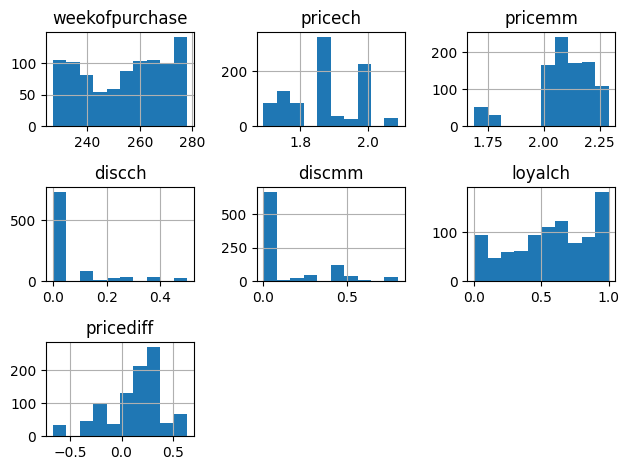

In [ ]:
df_juice_train.hist()
plt.tight_layout()
plt.show()

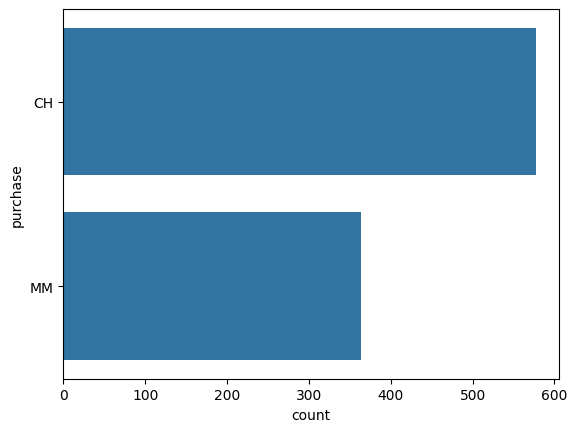

In [ ]:
sns.countplot(data=df_juice_train, y='purchase')
plt.show()

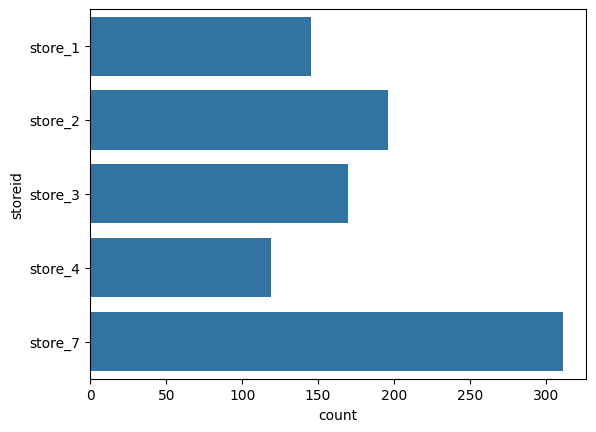

In [ ]:
sns.countplot(data=df_juice_train, y='storeid')
plt.show()

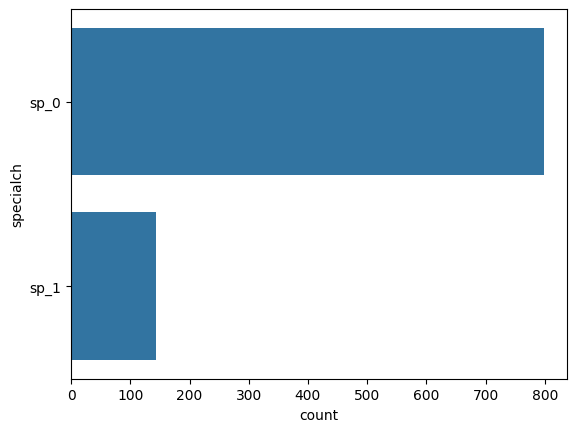

In [ ]:
sns.countplot(data=df_juice_train, y='specialch')
plt.show()

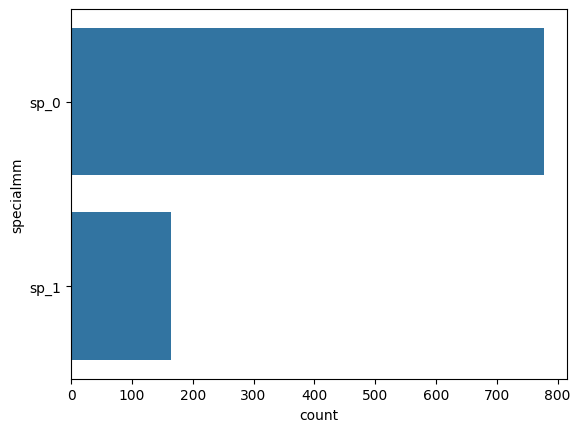

In [ ]:
sns.countplot(data=df_juice_train, y='specialmm')
plt.show()

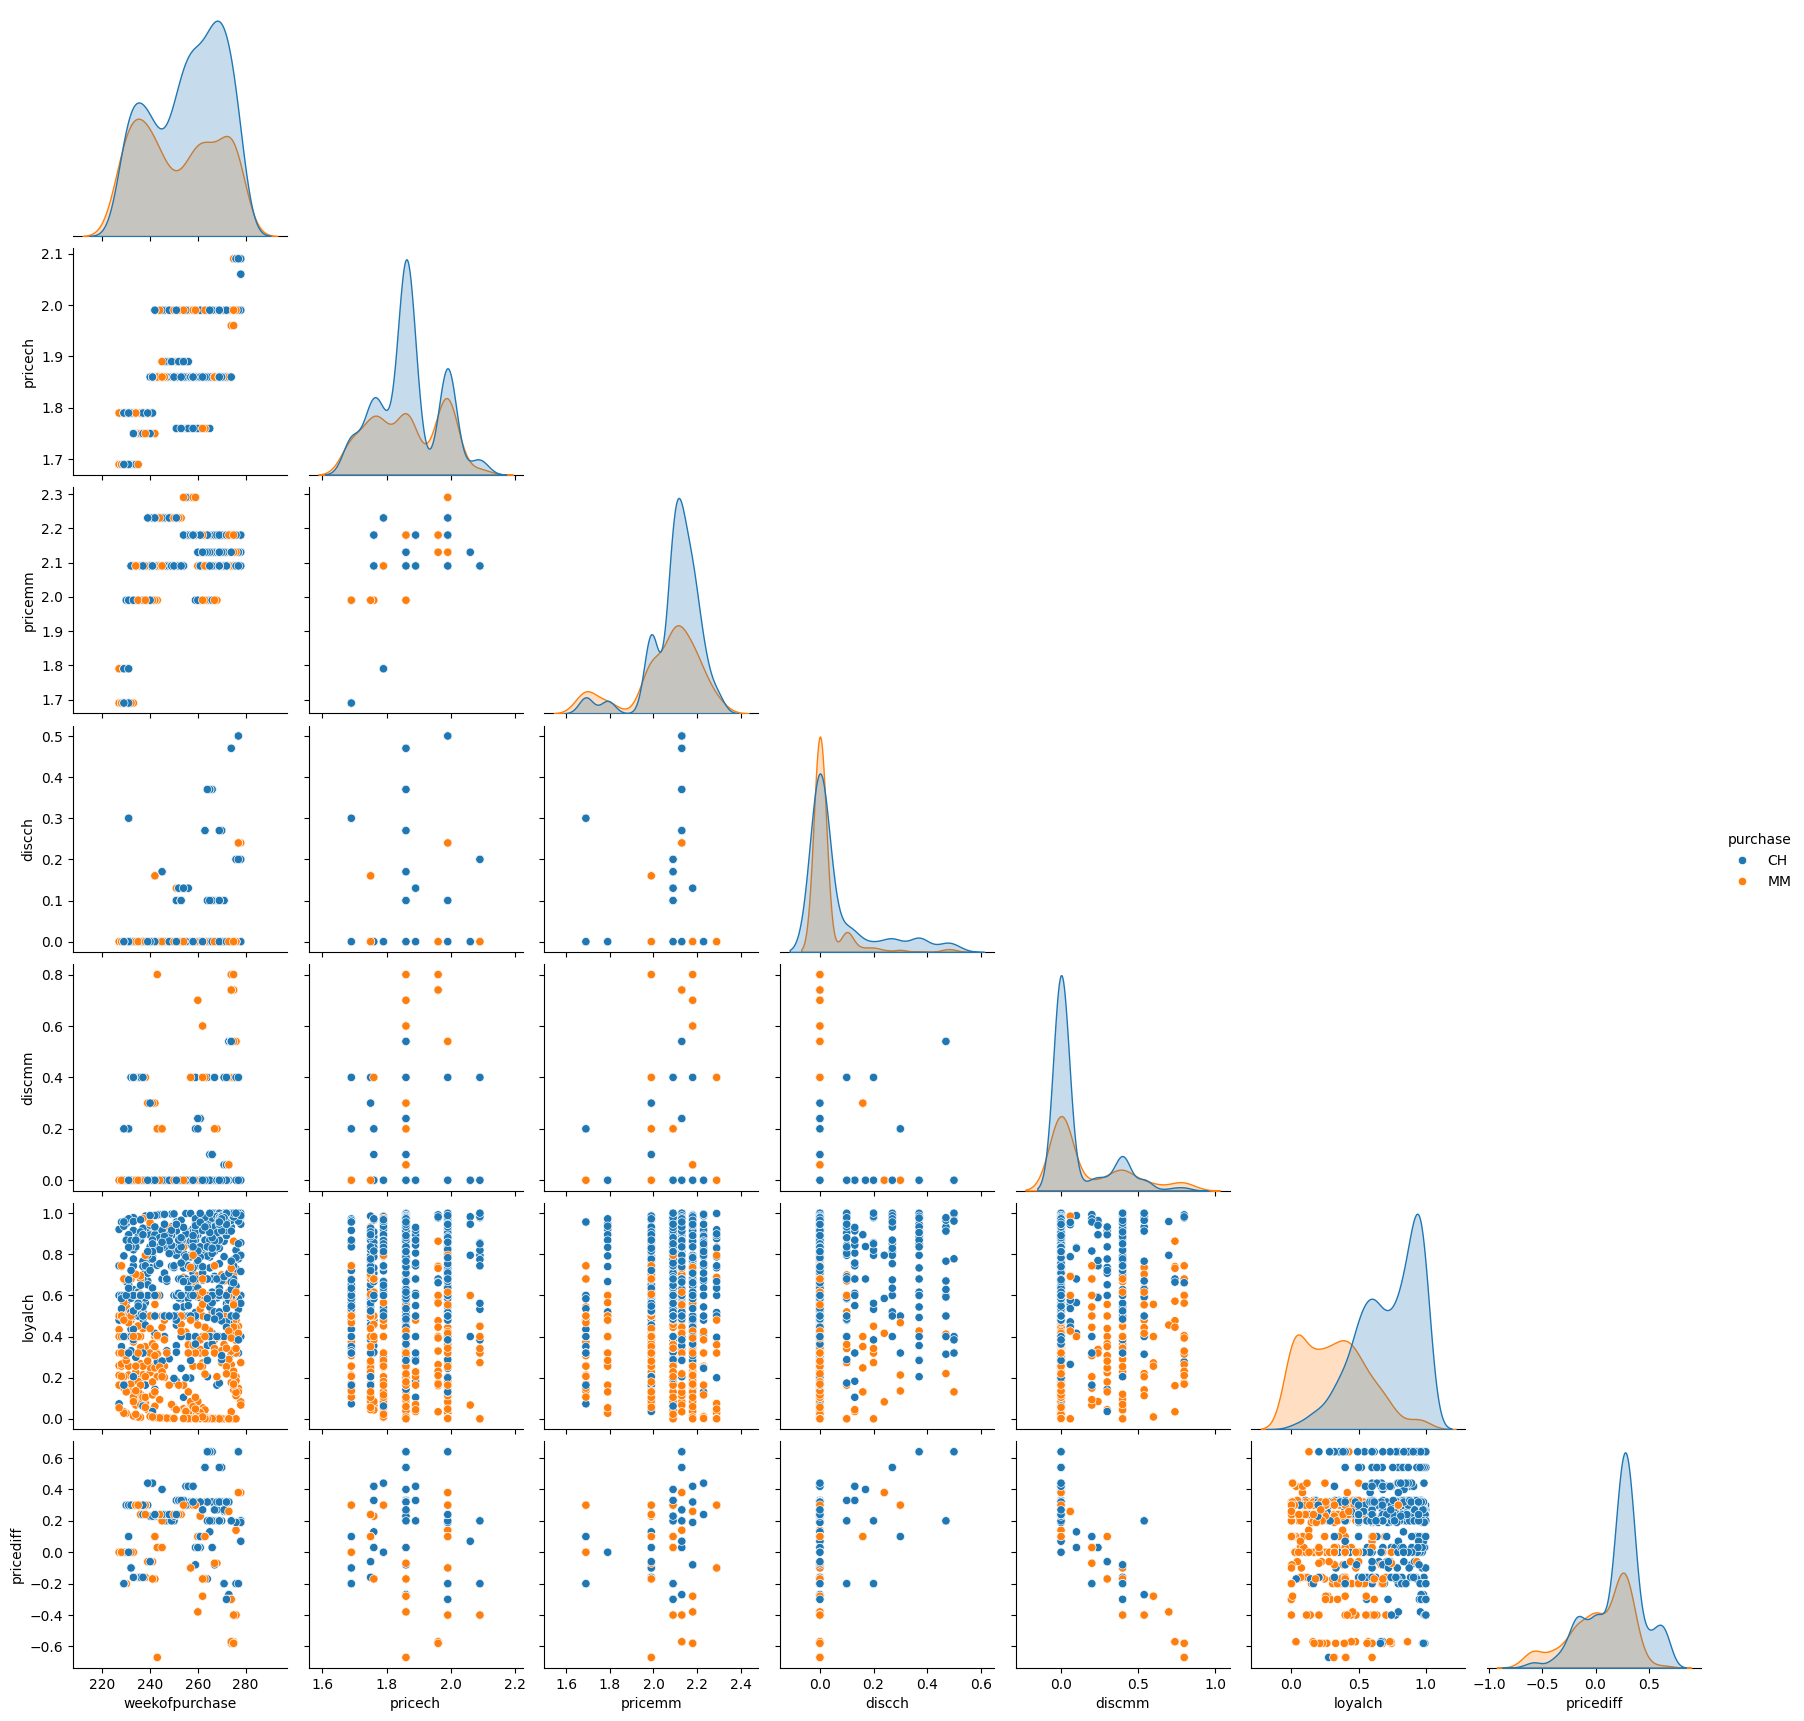

In [ ]:
sns.pairplot(df_juice_train, diag_kind='kde', hue='purchase', corner=True)
plt.show()

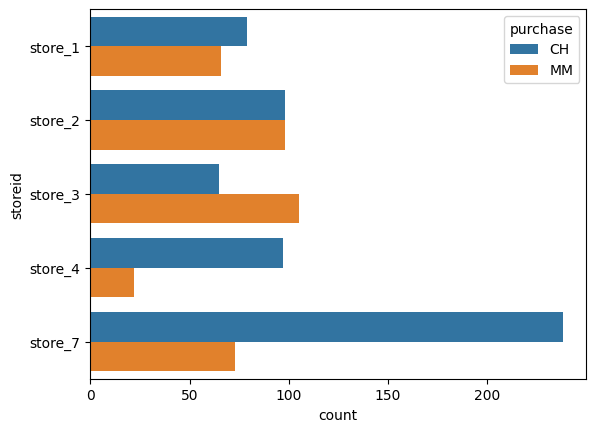

In [ ]:
sns.countplot(data=df_juice_train, y='storeid', hue='purchase')
plt.show()

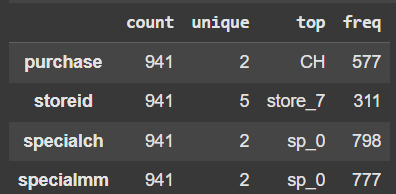

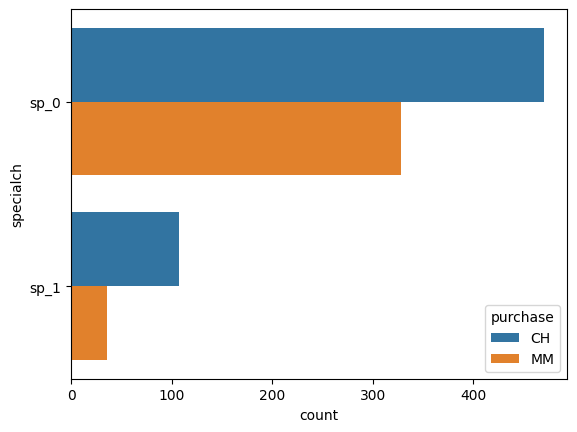

In [ ]:
sns.countplot(data=df_juice_train, y='specialch', hue='purchase')
plt.show()

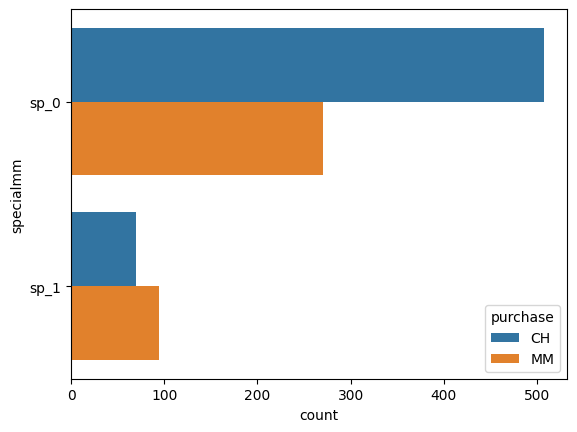

In [ ]:
sns.countplot(data=df_juice_train, y='specialmm', hue='purchase')
plt.show()

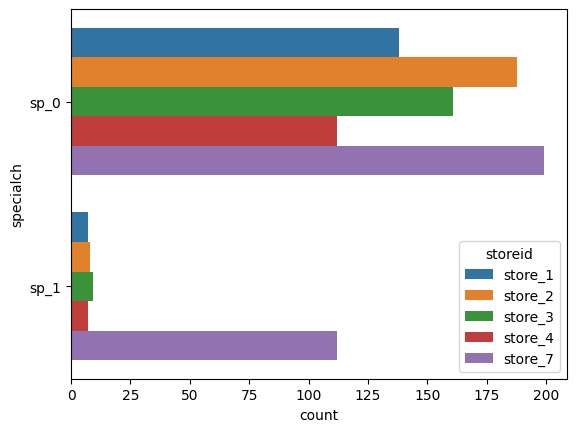

In [ ]:
sns.countplot(data=df_juice_train, y='specialch', hue='storeid')
plt.show()

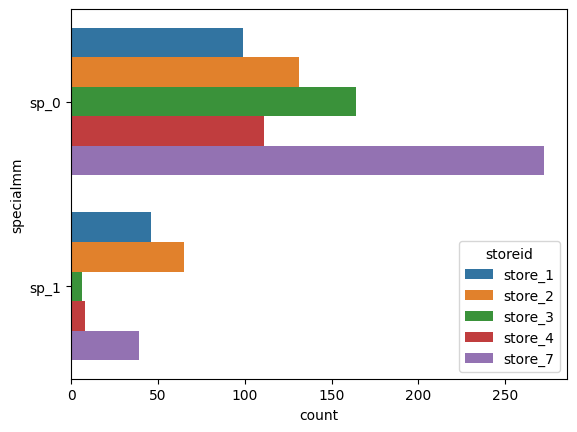

In [ ]:
sns.countplot(data=df_juice_train, y='specialmm', hue='storeid')
plt.show()

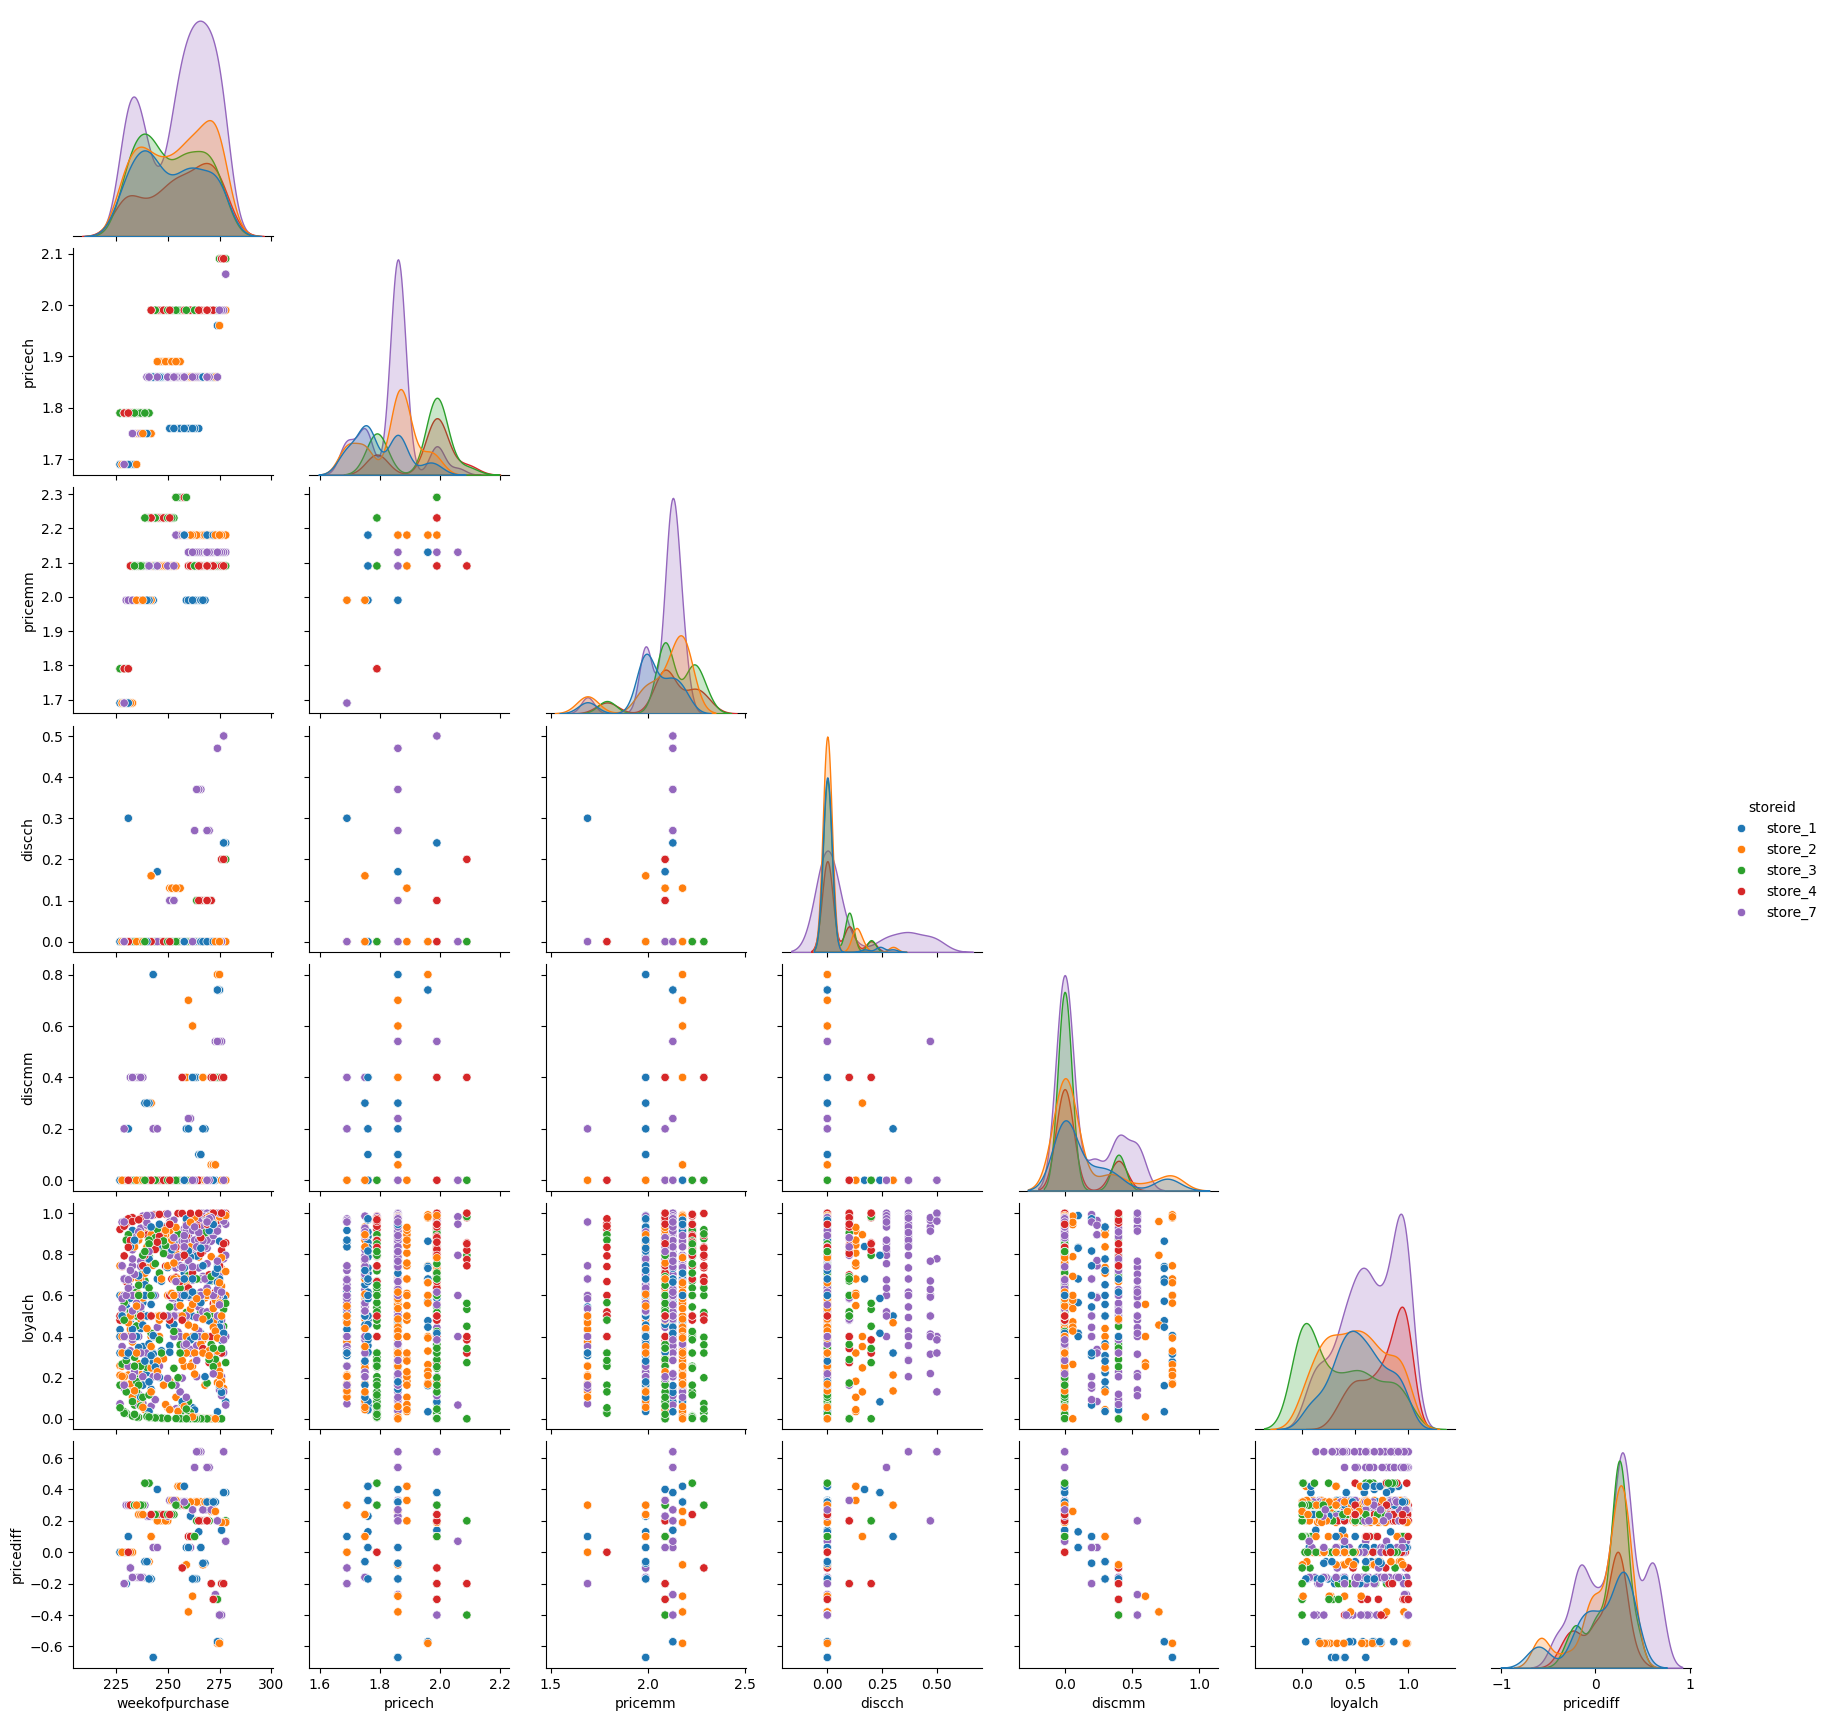

In [ ]:
sns.pairplot(df_juice_train, diag_kind='kde', hue='storeid', corner=True)
plt.show()

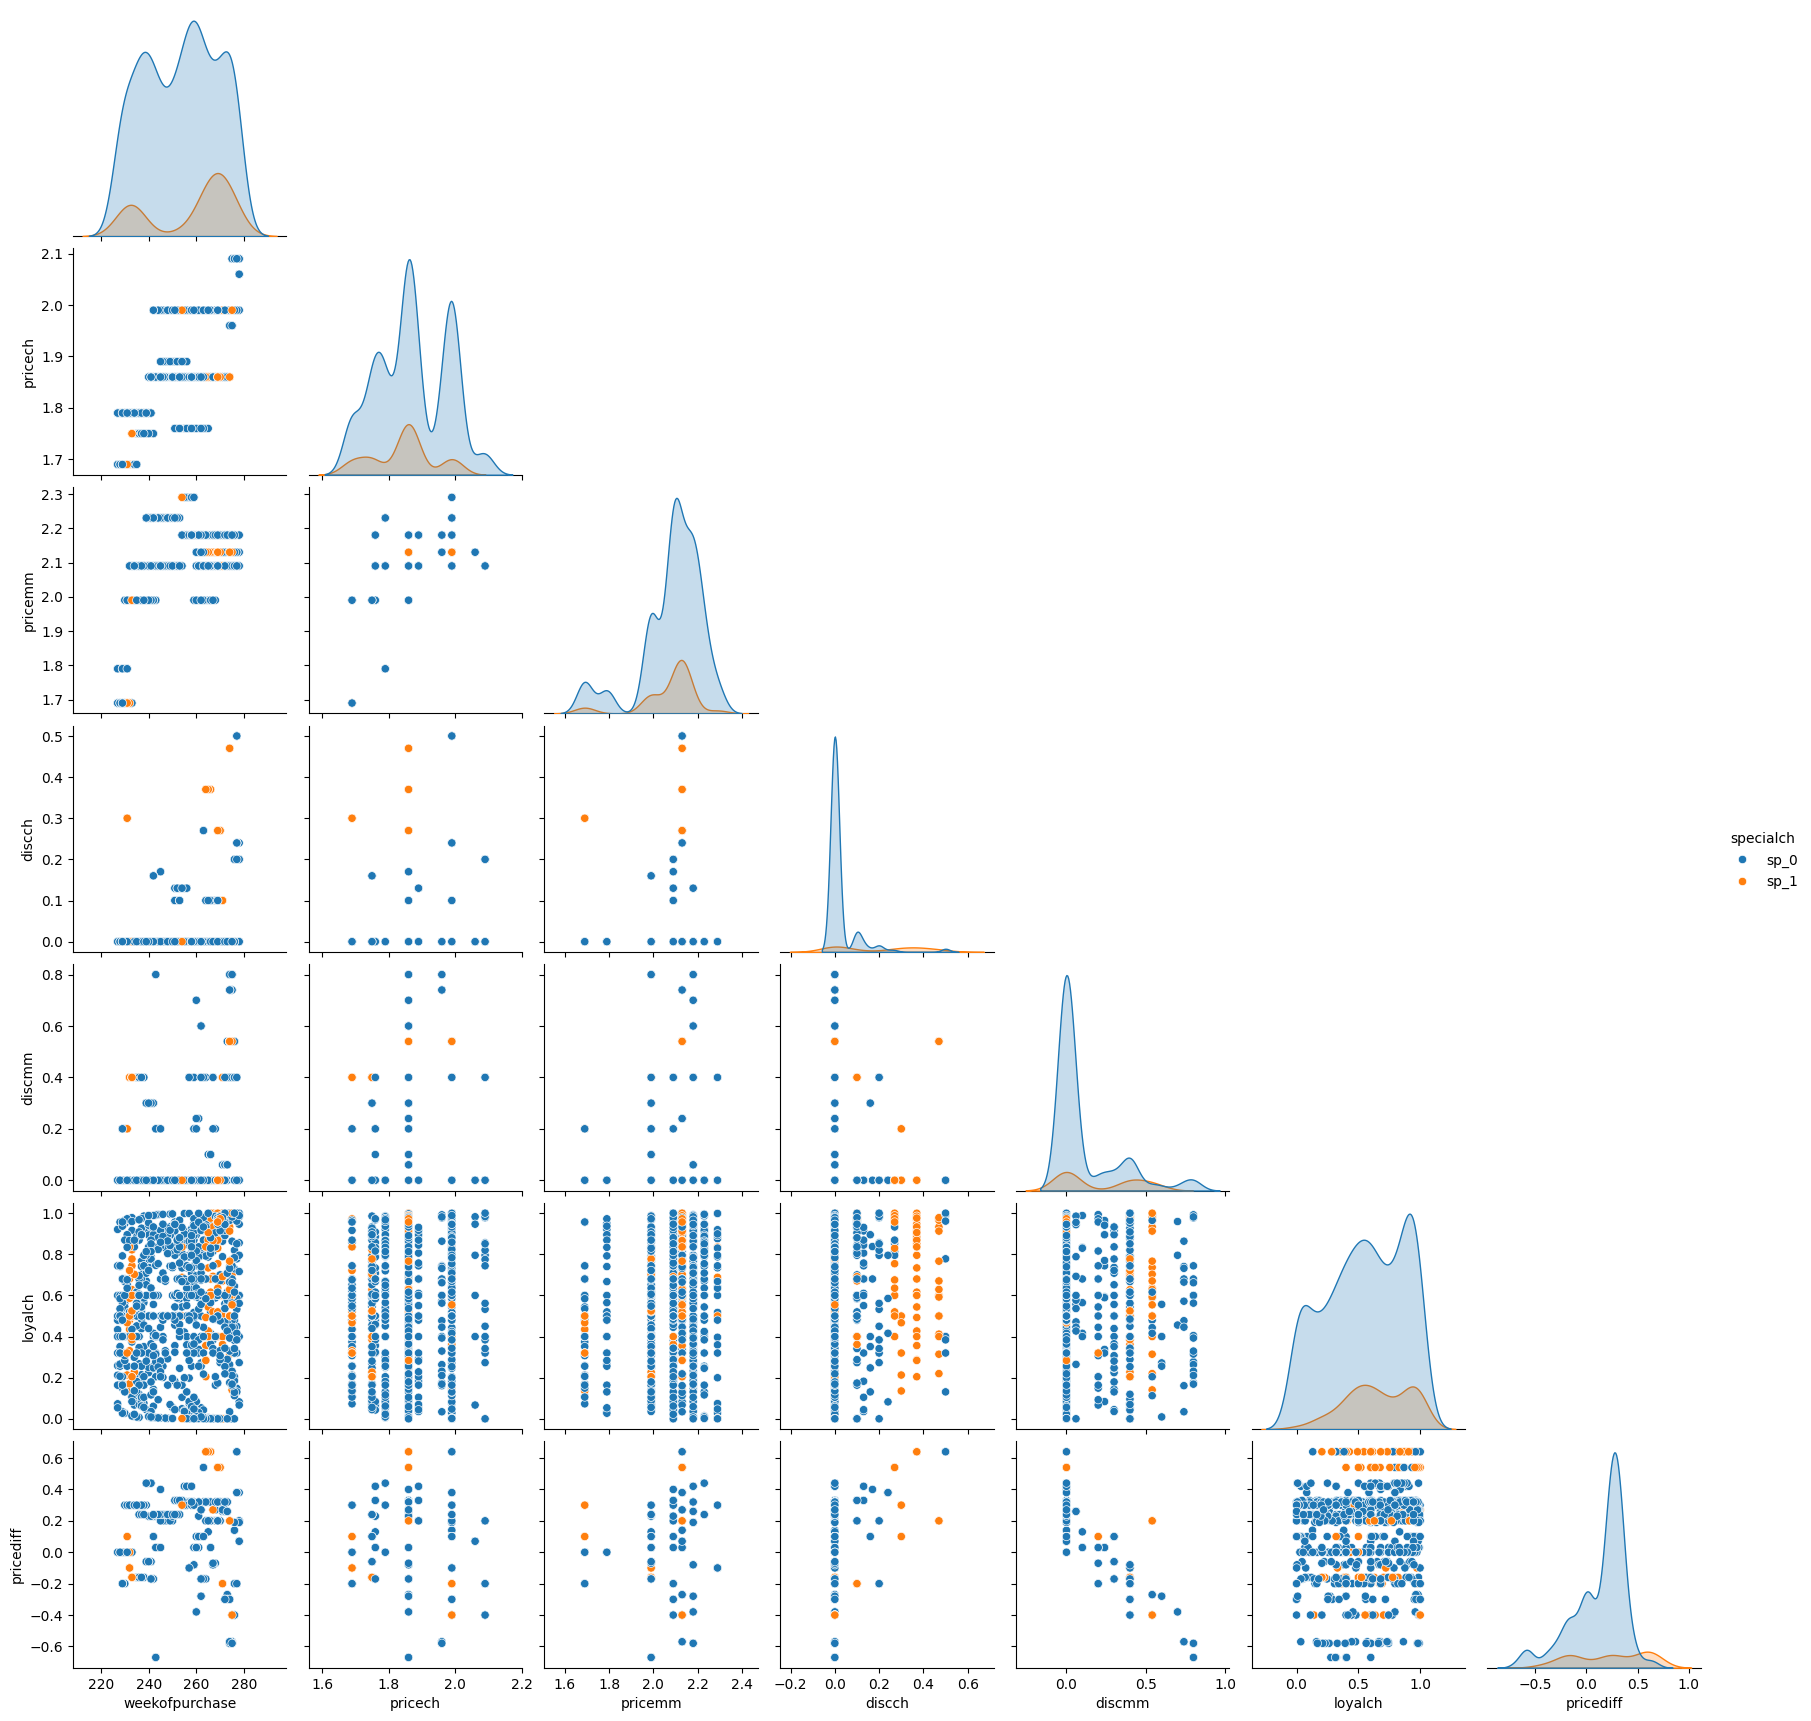

In [ ]:
sns.pairplot(df_juice_train, diag_kind='kde', hue='specialch', corner=True)
plt.show()

In [ ]:
df_juice_train.select_dtypes('number').corr()

,weekofpurchase,pricech,pricemm,discch,discmm,loyalch,pricediff
weekofpurchase,1.000000,0.707664,0.590575,0.365217,0.244516,0.190680,-0.007779
pricech,0.707664,1.000000,0.627995,0.153218,0.116171,0.080327,-0.088988
pricemm,0.590575,0.627995,1.000000,0.065149,0.004213,0.123151,0.287262
discch,0.365217,0.153218,0.065149,1.000000,0.011899,0.142065,0.395649
discmm,0.244516,0.116171,0.004213,0.011899,1.000000,-0.021319,-0.826507
loyalch,0.190680,0.080327,0.123151,0.142065,-0.021319,1.000000,0.109171
pricediff,-0.007779,-0.088988,0.287262,0.395649,-0.826507,0.109171,1.000000


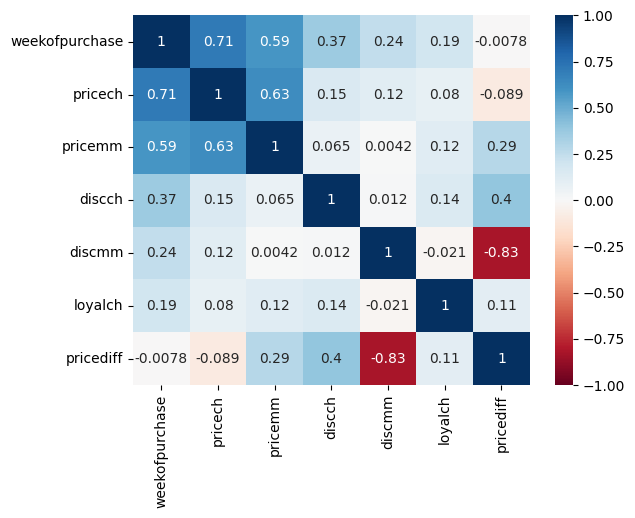

In [ ]:
sns.heatmap(data= df_juice_train.select_dtypes('number').corr(), vmin=-1, vmax=1, cmap="RdBu", annot=True) #Solo funciona con variables numericas
plt.show()